## Project - Predict the estimated time of arrival (ETA) for motorbike deliveries in Nairobi

### Background

Sendy was a logistics and fulfillment startup that provided services such as on-demand delivery, freight, warehousing, and fulfillment services to businesses and individuals.

It operated primarily in africa, with a huge presence in Kenya. Its main services included Sendy Transport, Sendy Freight, and Sendy Supply. 

It set itself apart by embedding technology to streamline its logistics processes. Most importantly, it used data analytics to improve operational efficiency and customer satisfaction.

The company, however, announced closure in August 2023 embarking on asset sales after being in existent since 2015.

### Project Objective

The primary objective of this project is to develop a predictive model that estimates the time of arrival (ETA) for orders placed on the Sendy platform. 

The ETA prediction will cover the period from pick-up to drop-off. The dataset provided by Sendy includes detailed order information and rider metrics based on orders made using Sendy's API, web, and mobile applications. 

These platforms connect customers with vetted transporters, offering route optimization and efficient dispatching of orders.

### Data Exploration and Preprocessing

In [68]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Load the Train data
TrainData = pd.read_csv('Datasets/Train.csv')

TrainData.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [70]:
# Load the Test data
TestData = pd.read_csv('Datasets/Test.csv')

TestData.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [71]:
# Load the Riders data
RidersData = pd.read_csv('Datasets/Riders.csv')

RidersData.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [72]:
# TrainData - Dataset information

TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [73]:
# Test Data - Dataset information

TestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

In [74]:
# RidersData - Dataset information

RidersData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


In [75]:
# Missing values - TrainData

TrainData.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [76]:
# Percentage of missing values - TrainData

round(TrainData.isnull().sum() / len(TrainData) * 100, 2)

Order No                                      0.00
User Id                                       0.00
Vehicle Type                                  0.00
Platform Type                                 0.00
Personal or Business                          0.00
Placement - Day of Month                      0.00
Placement - Weekday (Mo = 1)                  0.00
Placement - Time                              0.00
Confirmation - Day of Month                   0.00
Confirmation - Weekday (Mo = 1)               0.00
Confirmation - Time                           0.00
Arrival at Pickup - Day of Month              0.00
Arrival at Pickup - Weekday (Mo = 1)          0.00
Arrival at Pickup - Time                      0.00
Pickup - Day of Month                         0.00
Pickup - Weekday (Mo = 1)                     0.00
Pickup - Time                                 0.00
Arrival at Destination - Day of Month         0.00
Arrival at Destination - Weekday (Mo = 1)     0.00
Arrival at Destination - Time  

In [77]:
# Missing values - TestData

TestData.isnull().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                             1437
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destinatio

In [78]:
# Percentage of missing values - TestData

round(TestData.isnull().sum() / len(TestData) * 100, 2)

Order No                                 0.00
User Id                                  0.00
Vehicle Type                             0.00
Platform Type                            0.00
Personal or Business                     0.00
Placement - Day of Month                 0.00
Placement - Weekday (Mo = 1)             0.00
Placement - Time                         0.00
Confirmation - Day of Month              0.00
Confirmation - Weekday (Mo = 1)          0.00
Confirmation - Time                      0.00
Arrival at Pickup - Day of Month         0.00
Arrival at Pickup - Weekday (Mo = 1)     0.00
Arrival at Pickup - Time                 0.00
Pickup - Day of Month                    0.00
Pickup - Weekday (Mo = 1)                0.00
Pickup - Time                            0.00
Distance (KM)                            0.00
Temperature                             20.33
Precipitation in millimeters            97.18
Pickup Lat                               0.00
Pickup Long                       

Both the Test and Train datasets have missing values in the Temperature and Precipitation columns. The Riders Dataset seems to have 100% complete data. We will handle the missing values in the next phase.

In both Train and Test datasets, we assume that the missing values in precipitation column is that no precipitation occurred at that time. Therefore, the missing values are filled with 0. 

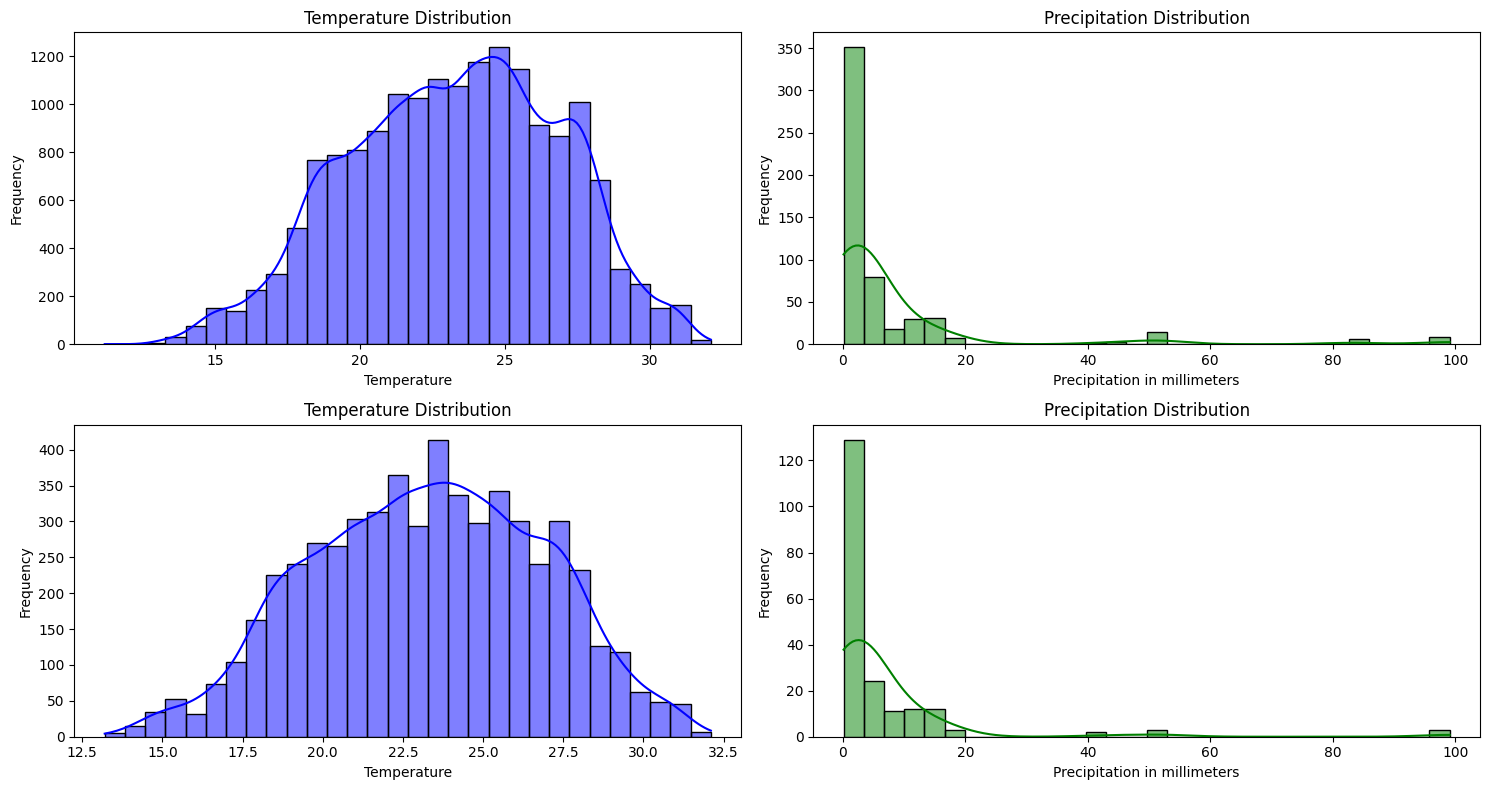

In [79]:
# Temperature and Precipitation distribution - initial exploration

fig, axes = plt.subplots(2, 2, figsize = (15, 8))

# Temperature distribution - TrainData
sns.histplot(TrainData['Temperature'], bins = 30, color = 'blue', kde = True, alpha = 0.5, ax = axes[0, 0])
axes[0, 0].set_title('Temperature Distribution')
axes[0, 0].set_xlabel('Temperature')
axes[0, 0].set_ylabel('Frequency')

# Precipitation distribution - TrainData
sns.histplot(TrainData['Precipitation in millimeters'], bins = 30, color = 'green', kde = True, alpha = 0.5, ax = axes[0, 1])
axes[0, 1].set_title('Precipitation Distribution')
axes[0, 1].set_xlabel('Precipitation in millimeters')
axes[0, 1].set_ylabel('Frequency')

# Temperature distribution - TestData
sns.histplot(TestData['Temperature'], bins = 30, color = 'blue', kde = True, alpha = 0.5, ax = axes[1, 0])
axes[1, 0].set_title('Temperature Distribution')
axes[1, 0].set_xlabel('Temperature')
axes[1, 0].set_ylabel('Frequency')

# Precipitation distribution - TestData
sns.histplot(TestData['Precipitation in millimeters'], bins = 30, color = 'green', kde = True, alpha = 0.5, ax = axes[1, 1])
axes[1, 1].set_title('Precipitation Distribution')
axes[1, 1].set_xlabel('Precipitation in millimeters')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

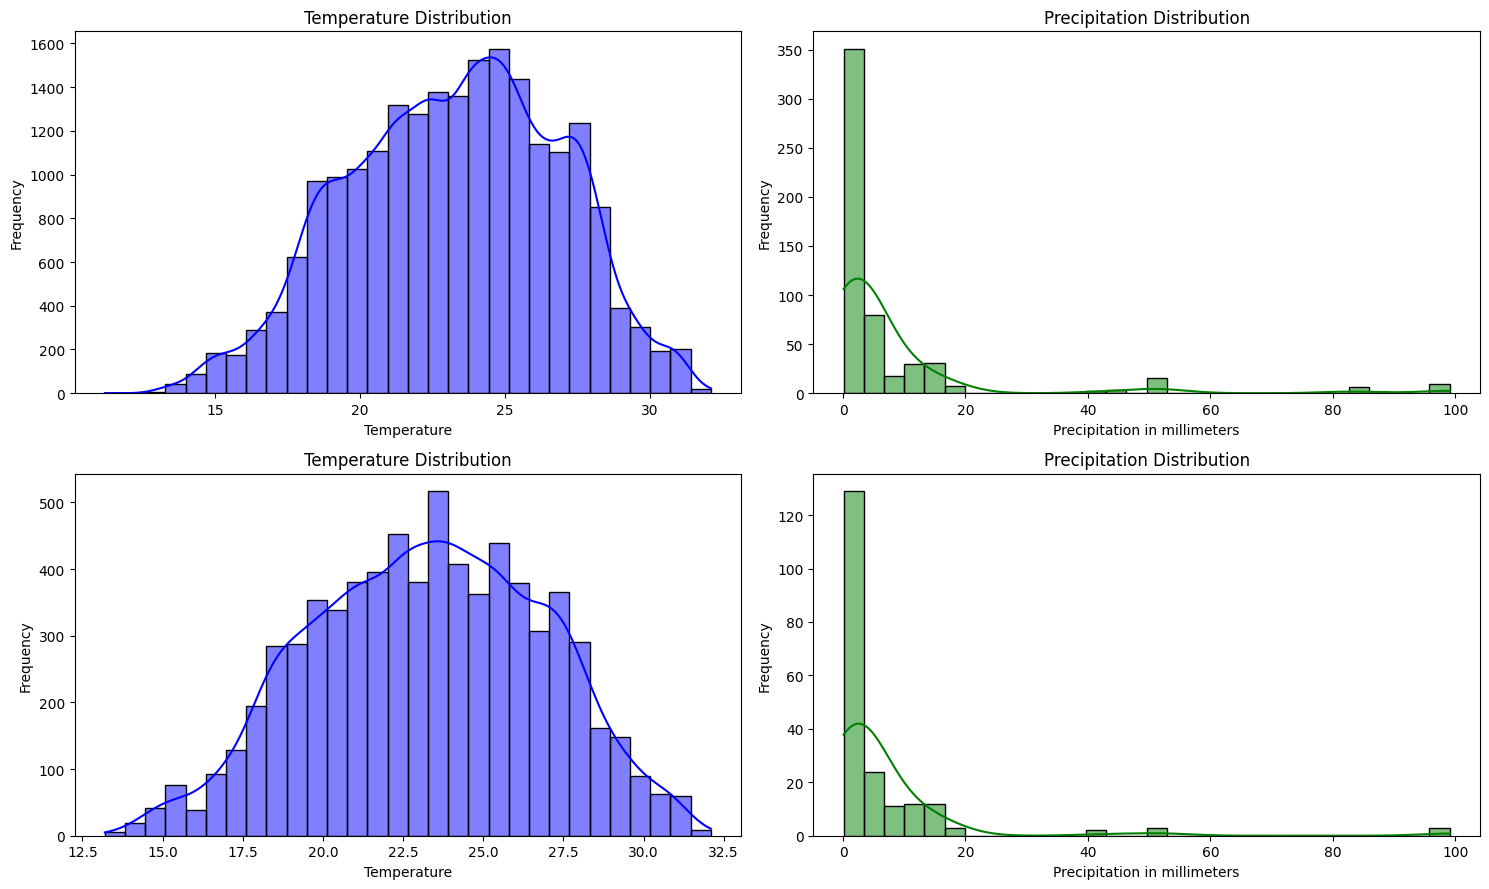

In [80]:
# Using forward fill to impute missing values in the Temperature column
def ffill_bfill(df, col):
    df[col] = df[col].ffill().bfill()
    
ffill_bfill(TrainData, 'Temperature')
ffill_bfill(TestData, 'Temperature')

# Create subplots
fig, axes = plt.subplots(2, 2, figsize = (15, 9))

# Temperature distribution
sns.histplot(TrainData['Temperature'], bins = 30, color = 'blue', kde = True, alpha = 0.5, ax = axes[0, 0])
axes[0, 0].set_title('Temperature Distribution')
axes[0, 0].set_xlabel('Temperature')
axes[0, 0].set_ylabel('Frequency')

# Precipitation distribution
sns.histplot(TrainData['Precipitation in millimeters'], bins = 30, color = 'green', kde = True, alpha = 0.5, ax = axes[0, 1])
axes[0, 1].set_title('Precipitation Distribution')
axes[0, 1].set_xlabel('Precipitation in millimeters')
axes[0, 1].set_ylabel('Frequency')

# Temperature distribution - TestData
sns.histplot(TestData['Temperature'], bins = 30, color = 'blue', kde = True, alpha = 0.5, ax = axes[1, 0])
axes[1, 0].set_title('Temperature Distribution')
axes[1, 0].set_xlabel('Temperature')
axes[1, 0].set_ylabel('Frequency')

# Precipitation distribution - TestData
sns.histplot(TestData['Precipitation in millimeters'], bins = 30, color = 'green', kde = True, alpha = 0.5, ax = axes[1, 1])
axes[1, 1].set_title('Precipitation Distribution')
axes[1, 1].set_xlabel('Precipitation in millimeters')
axes[1, 1].set_ylabel('Frequency')
plt.tight_layout()

plt.show()

Next, I will add a new column - RainToday From the Precipitation column - If the precipitation column has a value greater than 0, then it rained that day, else it did not rain.

In [81]:
def rain_today(df, precipitation_col, new_col = 'RainToday'):
    df[new_col] = np.where(df[precipitation_col] > 0, 'Yes', 'No')
    
rain_today(TrainData, 'Precipitation in millimeters')
rain_today(TestData, 'Precipitation in millimeters')

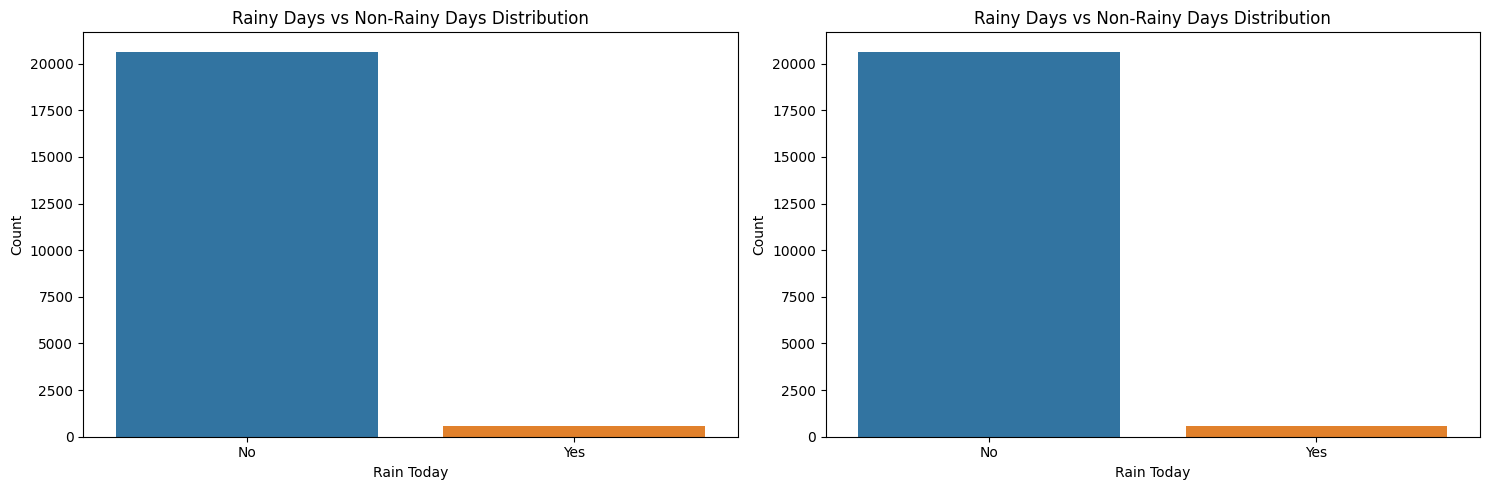

In [82]:
# Inspecting distribution of rainy and non-rainy days.

# Create subplots
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

# Rainy Days vs Non-Rainy Days distribution
sns.countplot(data = TrainData, x = 'RainToday', hue = 'RainToday', ax = axes[0], dodge = False)
axes[0].set_title('Rainy Days vs Non-Rainy Days Distribution')
axes[0].set_xlabel('Rain Today')
axes[0].set_ylabel('Count')

sns.countplot(data = TrainData, x = 'RainToday', hue = 'RainToday', ax = axes[1], dodge = False)
axes[1].set_title('Rainy Days vs Non-Rainy Days Distribution')
axes[1].set_xlabel('Rain Today')
axes[1].set_ylabel('Count')

plt.tight_layout()

plt.show()

There were few rainy days, as extracted from the precipitation column.

In [83]:
TrainData.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [16]:
TestData.isnull().sum()

Order No                                0
User Id                                 0
Vehicle Type                            0
Platform Type                           0
Personal or Business                    0
Placement - Day of Month                0
Placement - Weekday (Mo = 1)            0
Placement - Time                        0
Confirmation - Day of Month             0
Confirmation - Weekday (Mo = 1)         0
Confirmation - Time                     0
Arrival at Pickup - Day of Month        0
Arrival at Pickup - Weekday (Mo = 1)    0
Arrival at Pickup - Time                0
Pickup - Day of Month                   0
Pickup - Weekday (Mo = 1)               0
Pickup - Time                           0
Distance (KM)                           0
Temperature                             0
Pickup Lat                              0
Pickup Long                             0
Destination Lat                         0
Destination Long                        0
Rider Id                          

In [85]:
# Duplicated values

def is_duplicated(df):
    df.duplicated()

# Train data
duplicates = is_duplicated(TrainData)

print(duplicates)

None


In [86]:
# Test data duplicates

duplicates_test = is_duplicated(TestData)

print(duplicates_test)

None


In [87]:
# Riders data duplicates

duplicates_riders = is_duplicated(RidersData)

print(duplicates_riders)

None


### Exploratory Data Analysis

array([[<Axes: title={'center': 'Platform Type'}>,
        <Axes: title={'center': 'Placement - Day of Month'}>,
        <Axes: title={'center': 'Placement - Weekday (Mo = 1)'}>,
        <Axes: title={'center': 'Confirmation - Day of Month'}>],
       [<Axes: title={'center': 'Confirmation - Weekday (Mo = 1)'}>,
        <Axes: title={'center': 'Arrival at Pickup - Day of Month'}>,
        <Axes: title={'center': 'Arrival at Pickup - Weekday (Mo = 1)'}>,
        <Axes: title={'center': 'Pickup - Day of Month'}>],
       [<Axes: title={'center': 'Pickup - Weekday (Mo = 1)'}>,
        <Axes: title={'center': 'Arrival at Destination - Day of Month'}>,
        <Axes: title={'center': 'Arrival at Destination - Weekday (Mo = 1)'}>,
        <Axes: title={'center': 'Distance (KM)'}>],
       [<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Precipitation in millimeters'}>,
        <Axes: title={'center': 'Pickup Lat'}>,
        <Axes: title={'center': 'Pickup Long'}>],


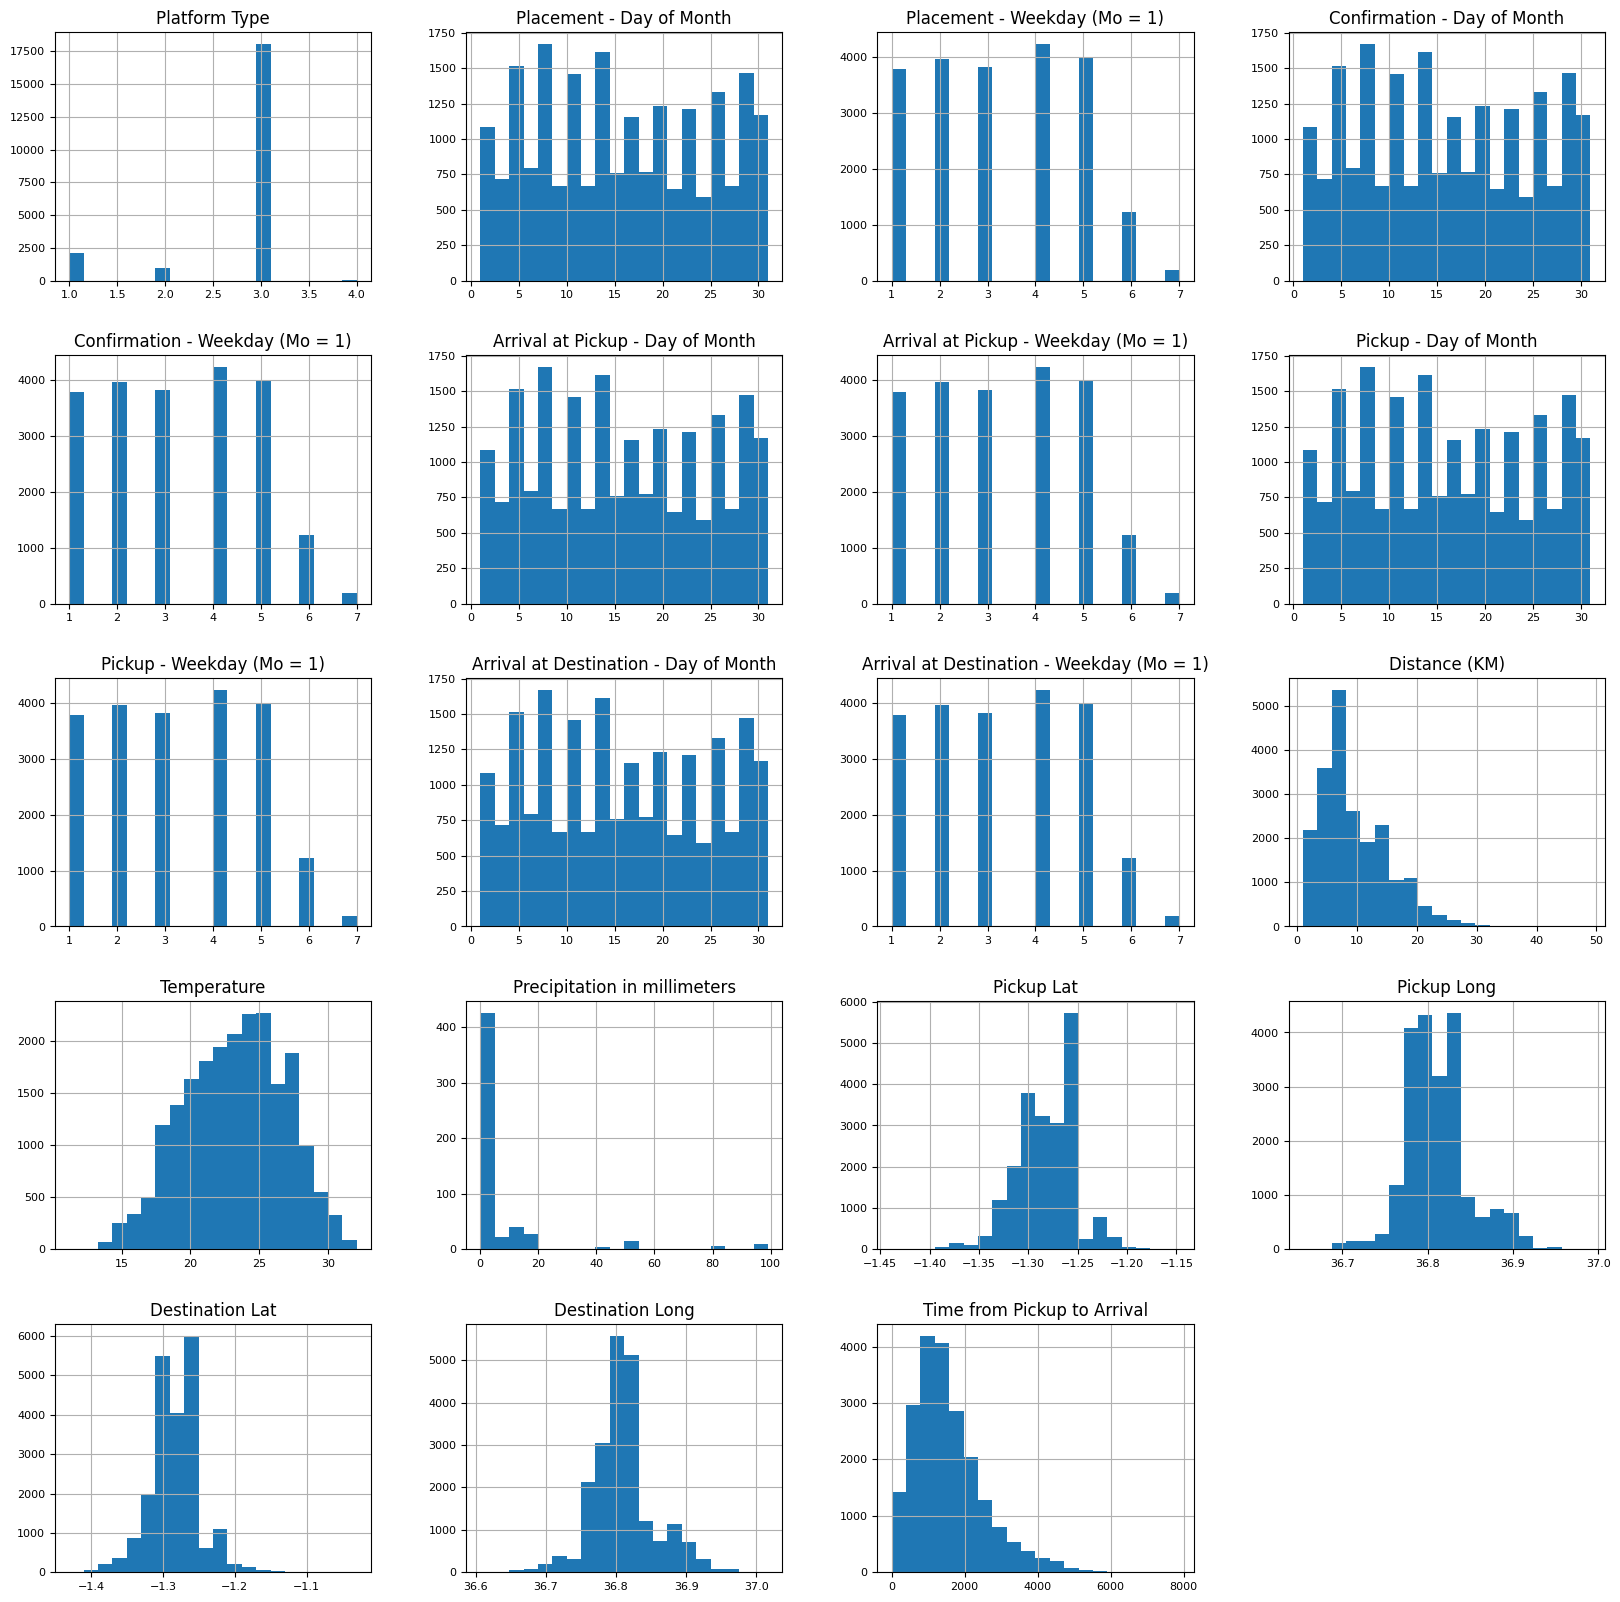

In [88]:
TrainData.hist(figsize = (20, 20), bins = 20, xlabelsize = 8, ylabelsize = 8)

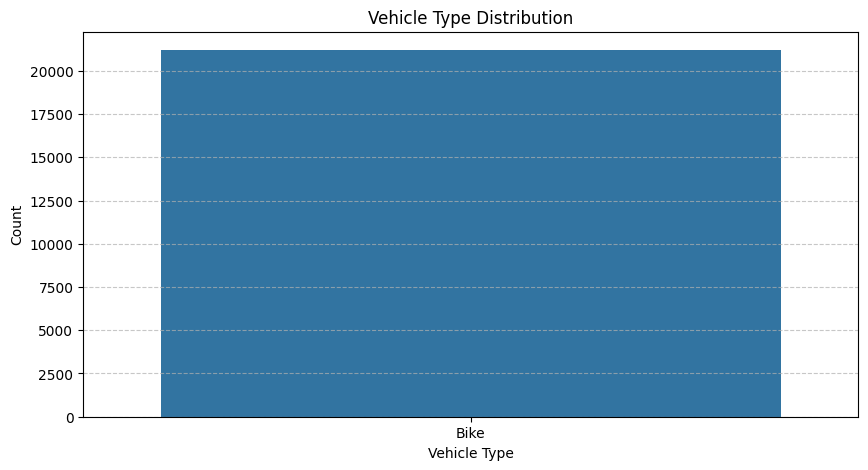

In [89]:
# Which vehicle type is used the most? - For this competition limited to bikes, however in practice, Sendy service extends to trucks and vans. 

plt.figure(figsize = (10, 5))

sns.countplot(x = 'Vehicle Type', data = TrainData)
plt.title('Vehicle Type Distribution')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

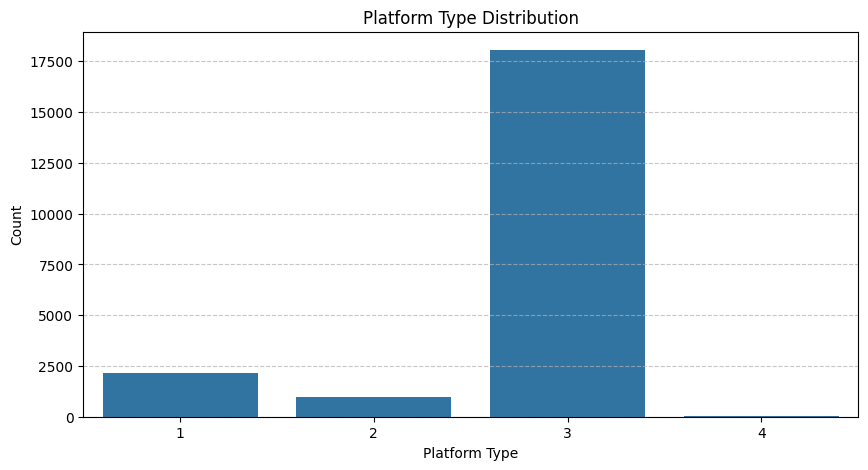

In [19]:
# What platforms are the most popular?

plt.figure(figsize = (10, 5))

sns.countplot(x = 'Platform Type', data = TrainData)
plt.title('Platform Type Distribution')
plt.xlabel('Platform Type')
plt.ylabel('Count')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

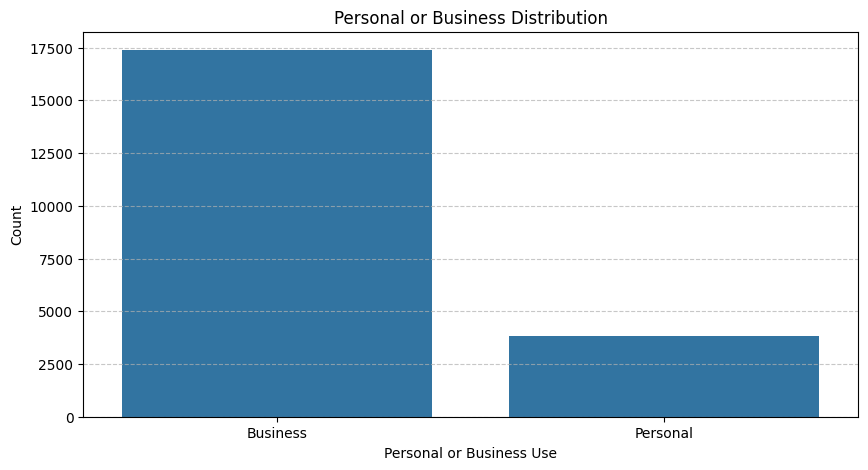

In [20]:
# Are the orders personal or business?

plt.figure(figsize = (10, 5))

sns.countplot(x = 'Personal or Business', data = TrainData)
plt.title('Personal or Business Distribution')
plt.xlabel('Personal or Business Use')
plt.ylabel('Count')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

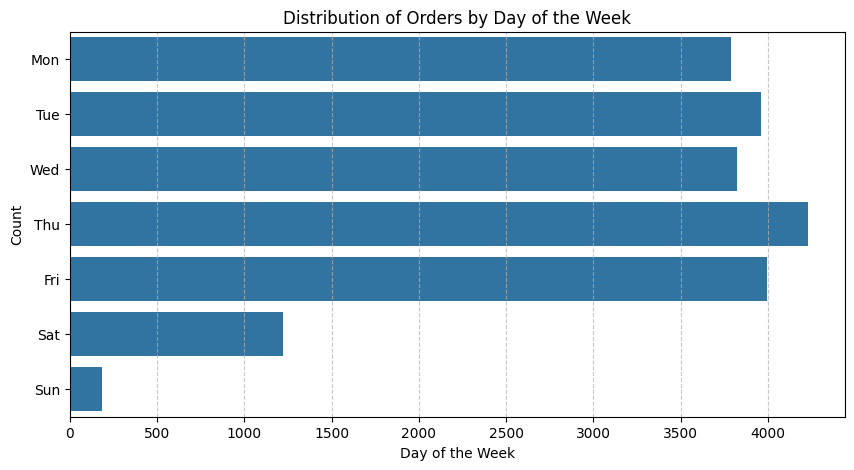

In [110]:
# How do orders vary with the day of the week?

plt.figure(figsize = (10, 5))

order_counts = TrainData['Placement - Weekday (Mo = 1)'].value_counts().sort_index()

sns.barplot(x = order_counts.values, y = order_counts.index, orient = 'h')

plt.title('Distribution of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')

plt.yticks(ticks = [0, 1, 2, 3, 4, 5, 6], 
           labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

plt.show()

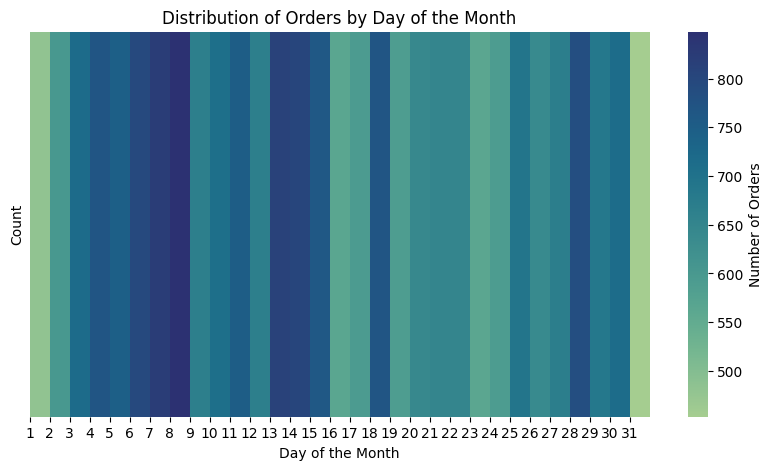

In [97]:
# What is the distribution of orders by day of the month?

daily_orders = TrainData['Placement - Day of Month'].value_counts().sort_index()

daily_orders_matrix = daily_orders.values.reshape(1, -1)

plt.figure(figsize = (10, 5))

sns.heatmap(daily_orders_matrix, cmap = "crest", cbar_kws = {'label': 'Number of Orders'})

plt.title('Distribution of Orders by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.xticks(range(0, 31, 1), range(1, 32, 1))
plt.yticks([])
plt.show()

In [23]:
# Joining the Rider data to the Train data on the 'Rider Id' column
TrainData = pd.merge(TrainData, RidersData, how = 'left', on = 'Rider Id')
TestData = pd.merge(TestData, RidersData, how = 'left', on = 'Rider Id')
TrainData.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,RainToday,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,36.830370,-1.300406,36.829741,Rider_Id_432,745,No,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,36.899315,-1.295004,36.814358,Rider_Id_856,1993,No,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,36.843419,-1.300921,36.828195,Rider_Id_155,455,No,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,36.832396,-1.257147,36.795063,Rider_Id_855,1341,No,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,36.792118,-1.295041,36.809817,Rider_Id_770,1214,No,2311,872,14.1,533


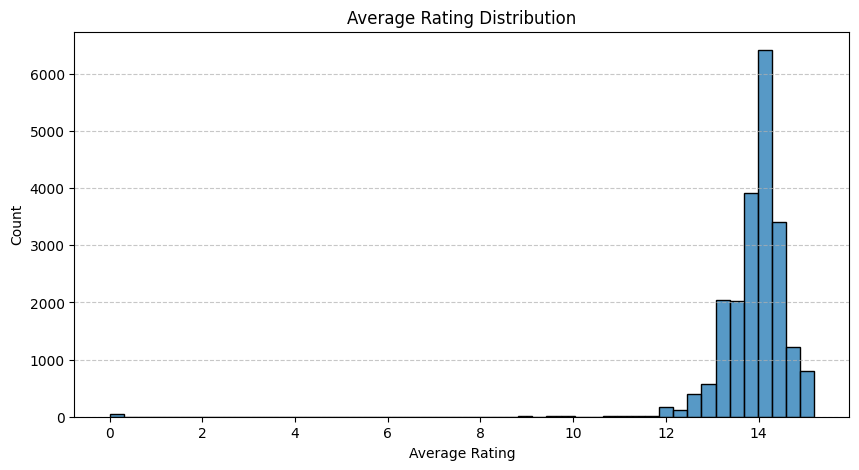

In [24]:
# What is the average rating of drivers?

plt.figure(figsize = (10, 5))

sns.histplot(TrainData['Average_Rating'], bins = 50)
plt.title('Average Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

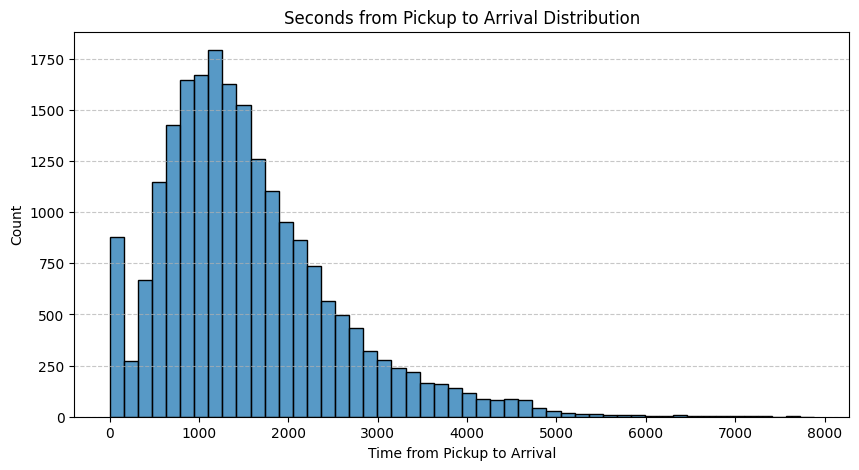

In [111]:
# What is the time taken to deliver orders?

plt.figure(figsize = (10, 5))

sns.histplot(TrainData['Time from Pickup to Arrival'], bins = 50)
plt.title('Seconds from Pickup to Arrival Distribution')
plt.xlabel('Time from Pickup to Arrival')
plt.ylabel('Count')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

In [114]:
# Checking for instances where time is less than 60 seconds

def is_less_than_60_seconds(df, col):
    return df[col] < 60

total_true = is_less_than_60_seconds(TrainData, 'Time from Pickup to Arrival')

print(total_true.sum())

740


In [115]:
# Check for instances where the distance covered was less than 100 meters

def is_less_than_100_meters(df, col):
    return df[col] < 0.1

total = is_less_than_60_seconds(TrainData, 'Distance (KM)')

print(total.sum())

21201


In [ ]:
# Inspecting outliers in the Time from Pickup to Arrival column



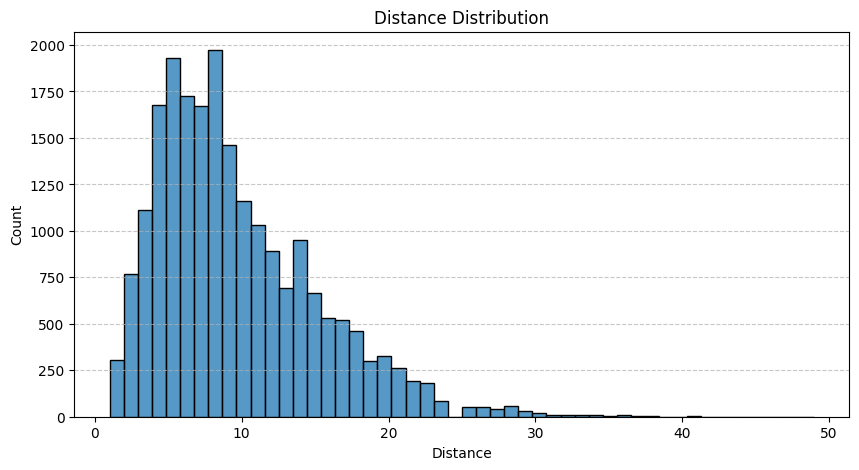

In [26]:
# What is the distance covered when delivering orders?

plt.figure(figsize = (10, 5))

sns.histplot(TrainData['Distance (KM)'], bins = 50)
plt.title('Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

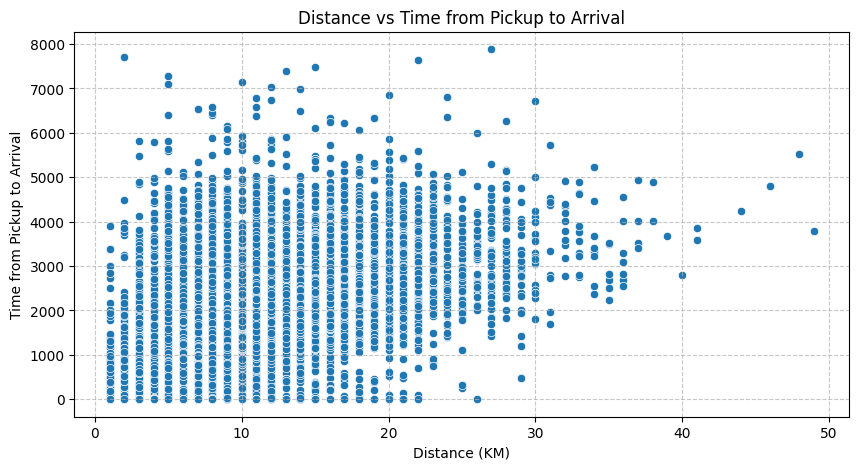

In [27]:
# What is the relationship between the distance covered and the time taken to deliver orders?

plt.figure(figsize = (10, 5))

sns.scatterplot(x = 'Distance (KM)', y = 'Time from Pickup to Arrival', data = TrainData)
plt.title('Distance vs Time from Pickup to Arrival')
plt.xlabel('Distance (KM)')
plt.ylabel('Time from Pickup to Arrival')
plt.grid(axis = 'both', linestyle = '--', alpha = 0.7)

plt.show()

In [28]:
# Convert date-time columns to datetime objects in the train dataset
datetime_columns = ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time', 'Arrival at Destination - Time']
for col in datetime_columns:
    if col in TrainData.columns:
        TrainData[col] = pd.to_datetime(TrainData[col], format='%I:%M:%S %p')

# Convert date-time columns to datetime objects in the test dataset
datetime_columns_test = ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time']
for col in datetime_columns_test:
    if col in TestData.columns:
        TestData[col] = pd.to_datetime(TestData[col], format='%I:%M:%S %p')

In [29]:
TrainData[['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time', 'Arrival at Destination - Time']].head()

,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time
0,1900-01-01 09:35:46,1900-01-01 09:40:10,1900-01-01 10:04:47,1900-01-01 10:27:30,1900-01-01 10:39:55
1,1900-01-01 11:16:16,1900-01-01 11:23:21,1900-01-01 11:40:22,1900-01-01 11:44:09,1900-01-01 12:17:22
2,1900-01-01 12:39:25,1900-01-01 12:42:44,1900-01-01 12:49:34,1900-01-01 12:53:03,1900-01-01 13:00:38
3,1900-01-01 09:25:34,1900-01-01 09:26:05,1900-01-01 09:37:56,1900-01-01 09:43:06,1900-01-01 10:05:27
4,1900-01-01 09:55:18,1900-01-01 09:56:18,1900-01-01 10:03:53,1900-01-01 10:05:23,1900-01-01 10:25:37


In [30]:
# Adding new columns for time differences in seconds

# Calculate time differences
TrainData['Time_Placement_to_Confirmation'] = (TrainData['Confirmation - Time'] - TrainData['Placement - Time']).dt.total_seconds()
TrainData['Time_Confirmation_to_Arrival_at_Pickup'] = (TrainData['Arrival at Pickup - Time'] - TrainData['Confirmation - Time']).dt.total_seconds()
TrainData['Time_Arrival_to_Pickup'] = (TrainData['Pickup - Time'] - TrainData['Arrival at Pickup - Time']).dt.total_seconds()
TrainData['Time_Pickup_to_Arrival'] = (TrainData['Arrival at Destination - Time'] - TrainData['Pickup - Time']).dt.total_seconds()

# For test set (only up to Pickup time)
TestData['Time_Placement_to_Confirmation'] = (TestData['Confirmation - Time'] - TestData['Placement - Time']).dt.total_seconds()
TestData['Time_Confirmation_to_Arrival_at_Pickup'] = (TestData['Arrival at Pickup - Time'] - TestData['Confirmation - Time']).dt.total_seconds()
TestData['Time_Arrival_to_Pickup'] = (TestData['Pickup - Time'] - TestData['Arrival at Pickup - Time']).dt.total_seconds()

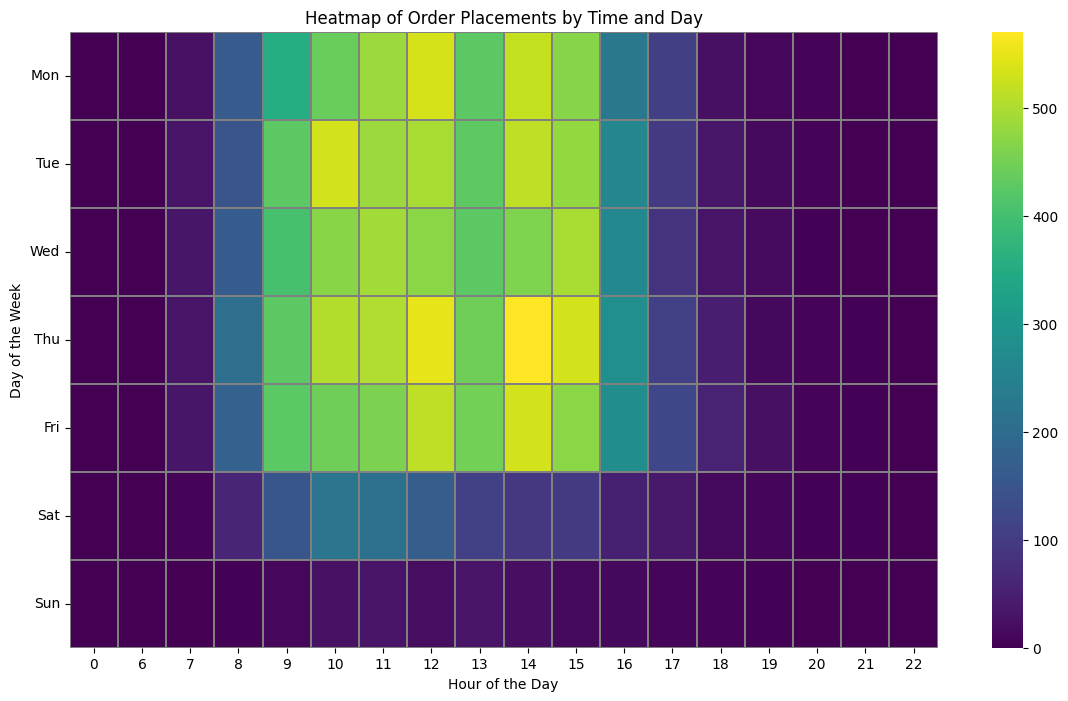

In [31]:
# What time of the day are orders placed?

# Pivot table for heatmap

heatmap_data = TrainData.pivot_table(index = 'Placement - Weekday (Mo = 1)', columns = TrainData['Placement - Time'].dt.hour, aggfunc = 'size', fill_value = 0)

plt.figure(figsize = (14, 8))
sns.heatmap(heatmap_data, cmap = 'viridis', cbar = True, linewidths = 0.1, linecolor = 'grey')
plt.title('Heatmap of Order Placements by Time and Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.yticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], 
           labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation = 0)
plt.show()

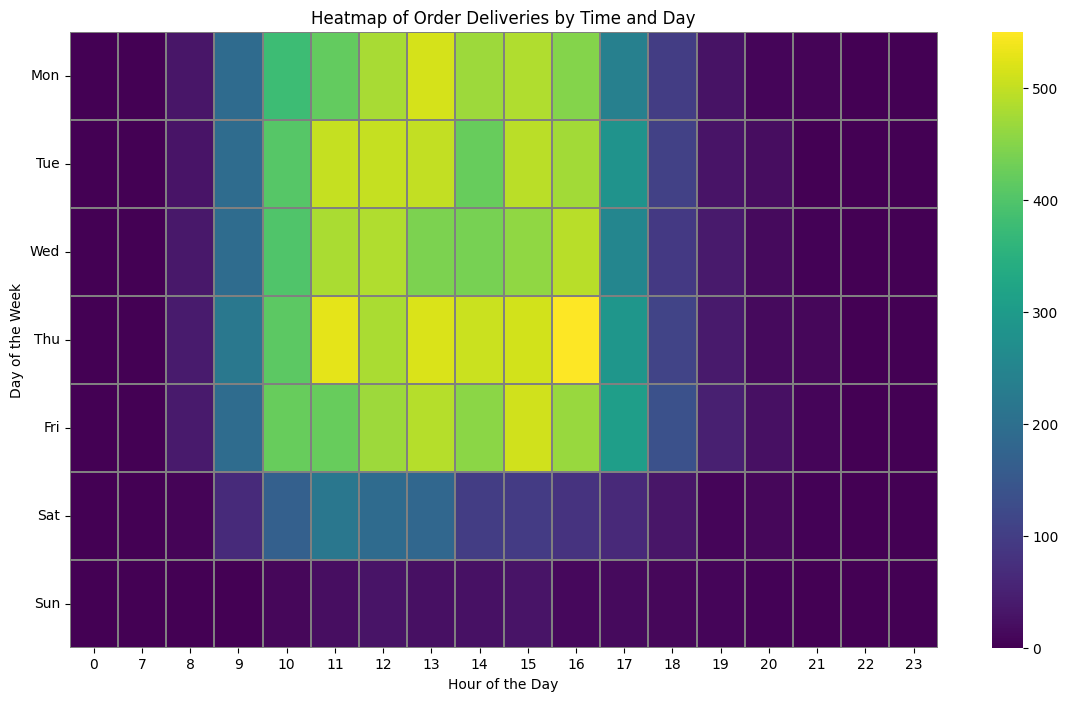

In [32]:
# What hour of the day are orders delivered?

# Pivot table for heatmap

heatmap_data = TrainData.pivot_table(index = 'Placement - Weekday (Mo = 1)', columns = TrainData['Arrival at Destination - Time'].dt.hour, aggfunc = 'size', fill_value = 0)

plt.figure(figsize = (14, 8))
sns.heatmap(heatmap_data, cmap = 'viridis', cbar = True, linewidths = 0.1, linecolor = 'grey')
plt.title('Heatmap of Order Deliveries by Time and Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.yticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], 
           labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation = 0)
plt.show()

In [33]:
TrainData.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Order No                                   21201 non-null  object        
 1   User Id                                    21201 non-null  object        
 2   Vehicle Type                               21201 non-null  object        
 3   Platform Type                              21201 non-null  int64         
 4   Personal or Business                       21201 non-null  object        
 5   Placement - Day of Month                   21201 non-null  int64         
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64         
 7   Placement - Time                           21201 non-null  datetime64[ns]
 8   Confirmation - Day of Month                21201 non-null  int64         
 9   Confirmation - We

In [34]:
# T-Tests for numerical columns

from scipy.stats import ttest_ind

# Perform the t-test
num_cols = TrainData.select_dtypes(include = ['int64', 'float64', 'int32', 'float32']).columns

for var in num_cols:
    if var in TrainData.columns:
        # Create two groups based on the median of the target variable
        median_time = TrainData['Time from Pickup to Arrival'].median()
        group1 = TrainData[TrainData['Time from Pickup to Arrival'] <= median_time][var]
        group2 = TrainData[TrainData['Time from Pickup to Arrival'] > median_time][var]
        # Perform t-test
        t_stat, p_val = ttest_ind(group1, group2)
        print(f'T-test for {var}: t-statistic = {t_stat}, p-value = {p_val}')

T-test for Platform Type: t-statistic = 0.2004561665469504, p-value = 0.8411257591562202
T-test for Placement - Day of Month: t-statistic = 1.8049645425879395, p-value = 0.07109441433934952
T-test for Placement - Weekday (Mo = 1): t-statistic = -0.8248592990414435, p-value = 0.4094607571532458
T-test for Confirmation - Day of Month: t-statistic = 1.802628340625434, p-value = 0.07146079998669146
T-test for Confirmation - Weekday (Mo = 1): t-statistic = -0.8380419469334393, p-value = 0.4020165937282001
T-test for Arrival at Pickup - Day of Month: t-statistic = 1.802628340625434, p-value = 0.07146079998669146
T-test for Arrival at Pickup - Weekday (Mo = 1): t-statistic = -0.8380419469334393, p-value = 0.4020165937282001
T-test for Pickup - Day of Month: t-statistic = 1.802628340625434, p-value = 0.07146079998669146
T-test for Pickup - Weekday (Mo = 1): t-statistic = -0.8380419469334393, p-value = 0.4020165937282001
T-test for Arrival at Destination - Day of Month: t-statistic = 1.80262834

In [35]:
# Chi-Square Test for categorical columns

from scipy.stats import chi2_contingency

cat_cols = TrainData.select_dtypes(include = 'object')

# Perform the chi-square test
for var in cat_cols:
    if var in TrainData.columns:
        # Create a contingency table
        contingency_table = pd.crosstab(TrainData['Time from Pickup to Arrival'], TrainData[var])
        # Perform chi-square test
        chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
        print(f'Chi-square test for {var}: chi2-statistic = {chi2_stat}, p-value = {p_val}')

Chi-square test for Order No: chi2-statistic = 86203266.00000273, p-value = 0.37838806273276243
Chi-square test for User Id: chi2-statistic = 12799137.867439294, p-value = 1.0
Chi-square test for Vehicle Type: chi2-statistic = 0.0, p-value = 1.0
Chi-square test for Personal or Business: chi2-statistic = 4011.122980765633, p-value = 0.7270456116887665
Chi-square test for Rider Id: chi2-statistic = 4083014.3690508627, p-value = 0.0
Chi-square test for RainToday: chi2-statistic = 4089.733578878326, p-value = 0.39355472366492034


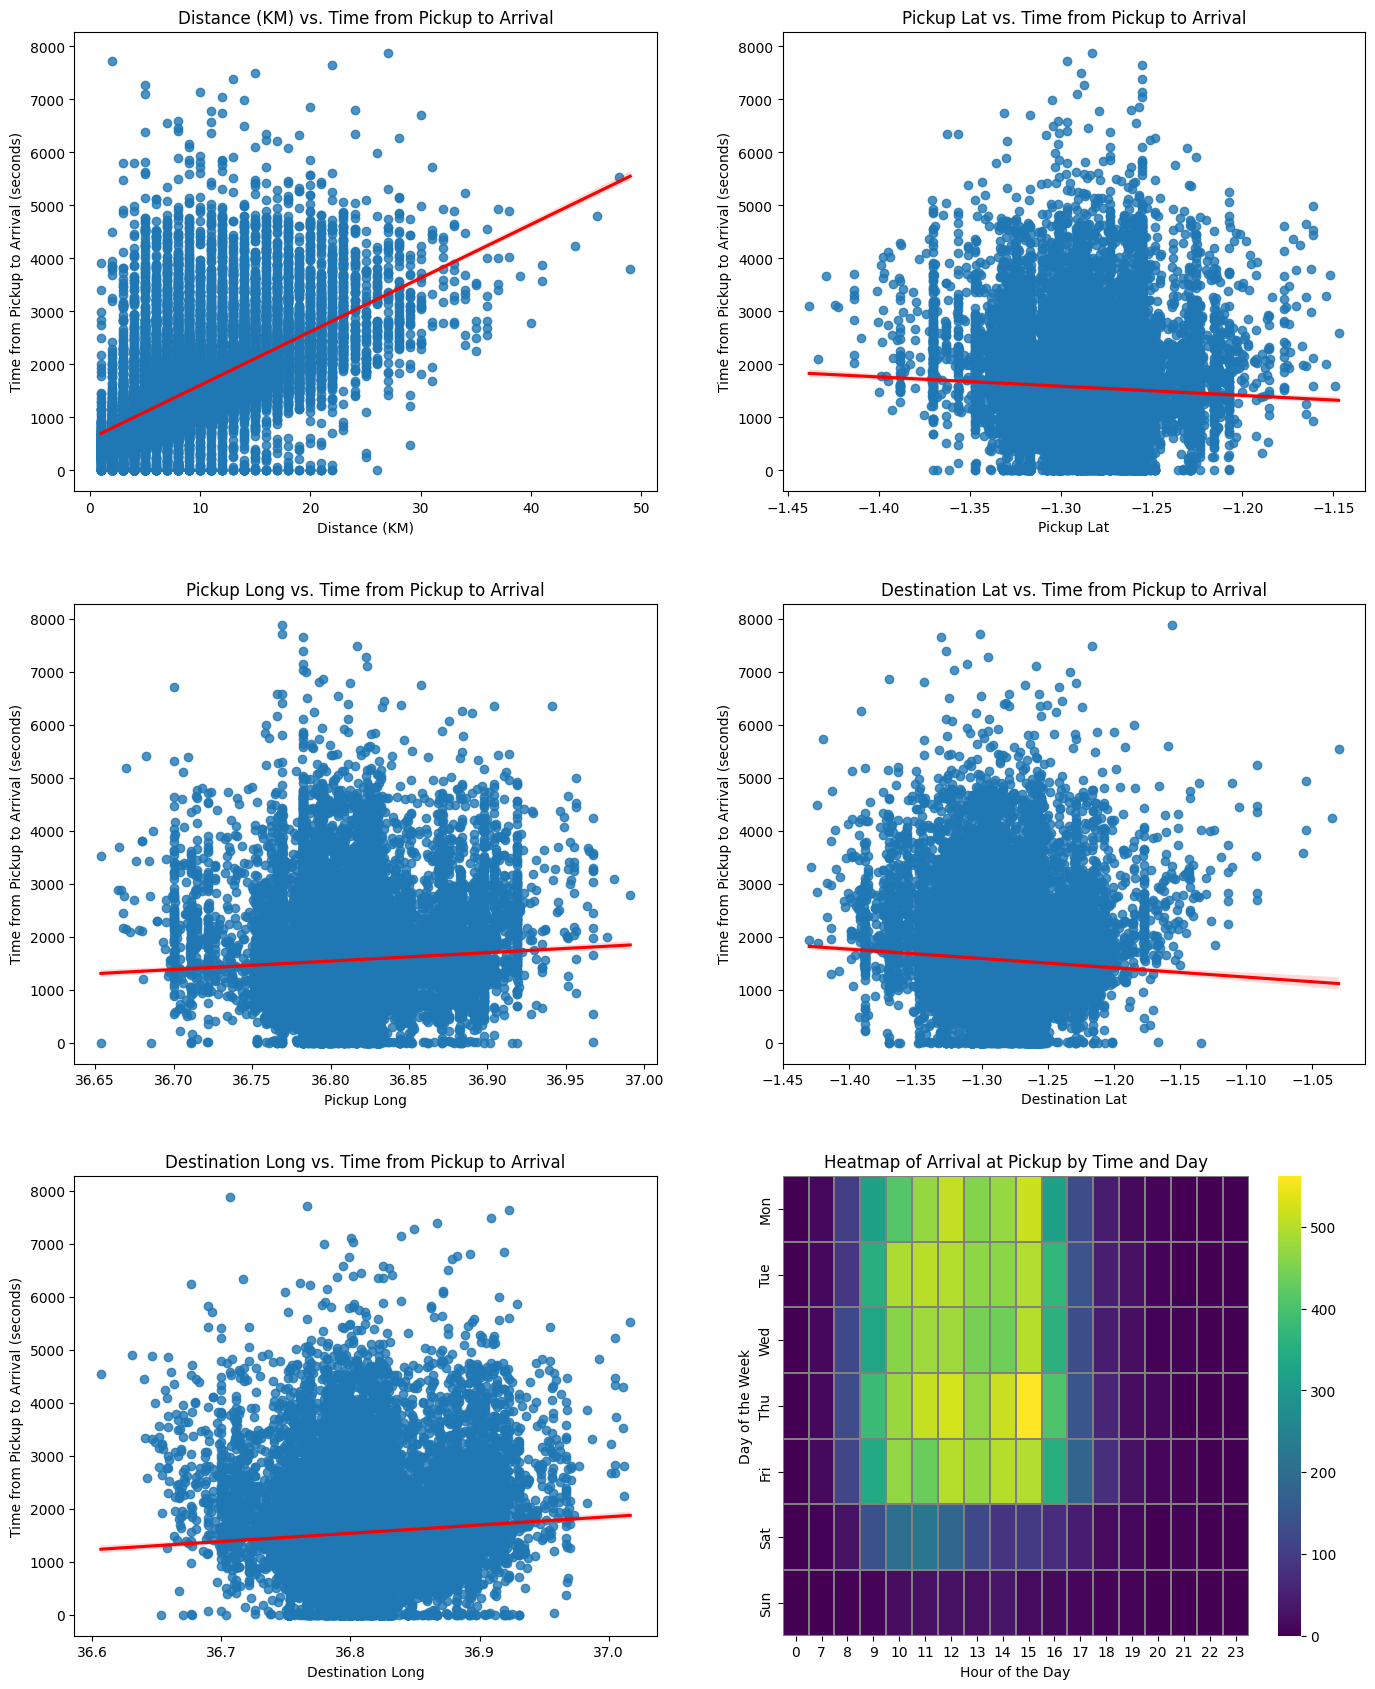

In [36]:
# Understanding and exploring key variables in the dataset

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 18))
fig.tight_layout(pad = 6.0)

# Distance (KM) vs. Time from Pickup to Arrival
sns.regplot(x = 'Distance (KM)', y = 'Time from Pickup to Arrival', data = TrainData, ax = axes[0, 0], line_kws = {'color': 'red'})
axes[0, 0].set_title('Distance (KM) vs. Time from Pickup to Arrival')
axes[0, 0].set_xlabel('Distance (KM)')
axes[0, 0].set_ylabel('Time from Pickup to Arrival (seconds)')

# Pickup Lat vs. Time from Pickup to Arrival
sns.regplot(x = 'Pickup Lat', y = 'Time from Pickup to Arrival', data = TrainData, ax = axes[0, 1], line_kws = {'color': 'red'})
axes[0, 1].set_title('Pickup Lat vs. Time from Pickup to Arrival')
axes[0, 1].set_xlabel('Pickup Lat')
axes[0, 1].set_ylabel('Time from Pickup to Arrival (seconds)')

# Pickup Long vs. Time from Pickup to Arrival
sns.regplot(x = 'Pickup Long', y = 'Time from Pickup to Arrival', data = TrainData, ax = axes[1, 0], line_kws = {'color': 'red'})
axes[1, 0].set_title('Pickup Long vs. Time from Pickup to Arrival')
axes[1, 0].set_xlabel('Pickup Long')
axes[1, 0].set_ylabel('Time from Pickup to Arrival (seconds)')

# Destination Lat vs. Time from Pickup to Arrival
sns.regplot(x = 'Destination Lat', y = 'Time from Pickup to Arrival', data = TrainData, ax = axes[1, 1], line_kws = {'color': 'red'})
axes[1, 1].set_title('Destination Lat vs. Time from Pickup to Arrival')
axes[1, 1].set_xlabel('Destination Lat')
axes[1, 1].set_ylabel('Time from Pickup to Arrival (seconds)')

# Destination Long vs. Time from Pickup to Arrival
sns.regplot(x = 'Destination Long', y = 'Time from Pickup to Arrival', data = TrainData, ax = axes[2, 0], line_kws = {'color': 'red'})
axes[2, 0].set_title('Destination Long vs. Time from Pickup to Arrival')
axes[2, 0].set_xlabel('Destination Long')
axes[2, 0].set_ylabel('Time from Pickup to Arrival (seconds)')

# Pivot table for heatmap
heatmap_data = TrainData.pivot_table(index = 'Placement - Weekday (Mo = 1)', columns = TrainData['Arrival at Pickup - Time'].dt.hour, aggfunc = 'size', fill_value = 0)

sns.heatmap(heatmap_data, cmap = 'viridis', cbar = True, linewidths = 0.1, linecolor = 'grey', ax = axes[2, 1])
axes[2, 1].set_title('Heatmap of Arrival at Pickup by Time and Day')
axes[2, 1].set_xlabel('Hour of the Day')
axes[2, 1].set_ylabel('Day of the Week')
axes[2, 1].set_yticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], 
                      labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.show()


In [37]:
TrainData_copy = TrainData.copy()

TestData_copy = TestData.copy()

In [38]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Order No                                   21201 non-null  object        
 1   User Id                                    21201 non-null  object        
 2   Vehicle Type                               21201 non-null  object        
 3   Platform Type                              21201 non-null  int64         
 4   Personal or Business                       21201 non-null  object        
 5   Placement - Day of Month                   21201 non-null  int64         
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64         
 7   Placement - Time                           21201 non-null  datetime64[ns]
 8   Confirmation - Day of Month                21201 non-null  int64         
 9   Confirmation - We

In [39]:
TestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Order No                                7068 non-null   object        
 1   User Id                                 7068 non-null   object        
 2   Vehicle Type                            7068 non-null   object        
 3   Platform Type                           7068 non-null   int64         
 4   Personal or Business                    7068 non-null   object        
 5   Placement - Day of Month                7068 non-null   int64         
 6   Placement - Weekday (Mo = 1)            7068 non-null   int64         
 7   Placement - Time                        7068 non-null   datetime64[ns]
 8   Confirmation - Day of Month             7068 non-null   int64         
 9   Confirmation - Weekday (Mo = 1)         7068 non-nul

In [40]:
TrainData_copy = TrainData.copy()

TestData_copy = TestData.copy()

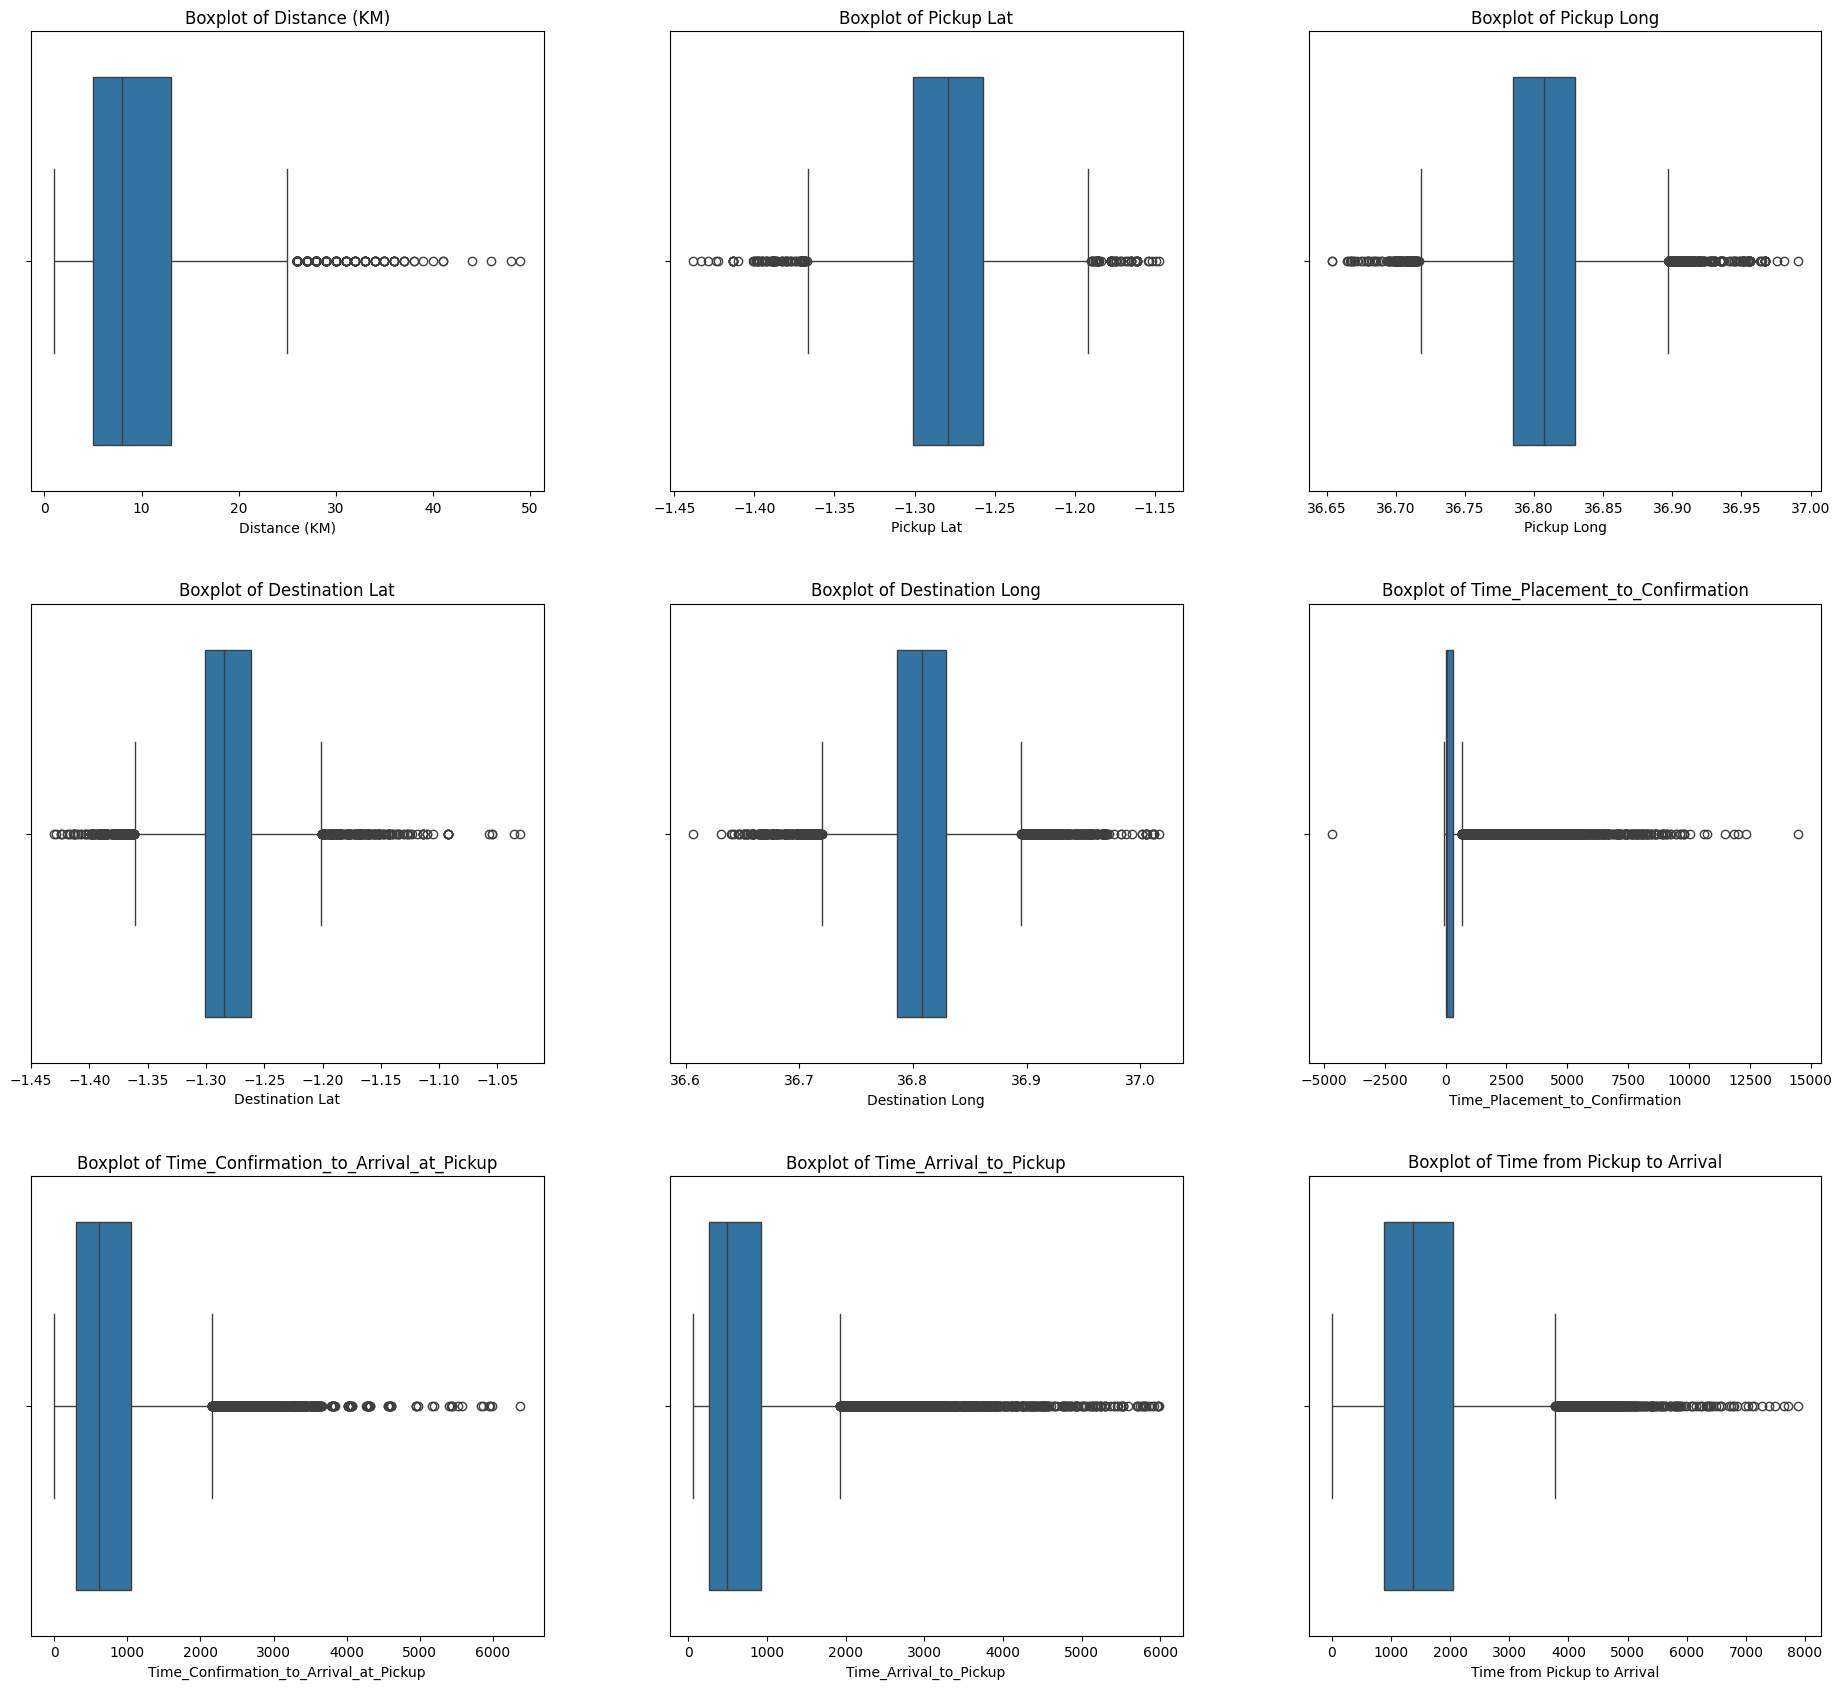

In [41]:
# Select best variables
selected_features = [
    'Distance (KM)', 'Pickup Lat', 'Pickup Long', 
    'Destination Lat', 'Destination Long', 
    'Time_Placement_to_Confirmation', 
    'Time_Confirmation_to_Arrival_at_Pickup', 
    'Time_Arrival_to_Pickup', 'Time from Pickup to Arrival'
]

def identify_outliers(df, cols):
    """
    Identify outliers in the dataset
    """
    outliers = []
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers.append(outlier)
    return outliers

# Identify outliers in the selected features
outliers = identify_outliers(TrainData_copy, selected_features)

# visualizing outliers
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 18))
fig.tight_layout(pad = 6.0)

for i, ax in enumerate(axes.flat):
    if i < len(selected_features):
        sns.boxplot(x = TrainData_copy[selected_features[i]], ax = ax)
        ax.set_title(f'Boxplot of {selected_features[i]}')
        ax.set_xlabel(selected_features[i])
        
plt.show()

In [42]:
# Remove outliers

def remove_outliers(df, cols):
    """
    Remove outliers from the dataset
    """
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from the specified columns
TrainData_copy = remove_outliers(TrainData_copy, selected_features)

In [43]:
# Using the selected features for training

TrainData_copy = TrainData_copy[selected_features]

# For the test set, select the same features as the training set except the target variable
TestData_copy = TestData_copy[TrainData_copy.columns[:-1]]

TestData_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Distance (KM)                           7068 non-null   int64  
 1   Pickup Lat                              7068 non-null   float64
 2   Pickup Long                             7068 non-null   float64
 3   Destination Lat                         7068 non-null   float64
 4   Destination Long                        7068 non-null   float64
 5   Time_Placement_to_Confirmation          7068 non-null   float64
 6   Time_Confirmation_to_Arrival_at_Pickup  7068 non-null   float64
 7   Time_Arrival_to_Pickup                  7068 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 441.9 KB


In [44]:
TrainData_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12519 entries, 0 to 21200
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Distance (KM)                           12519 non-null  int64  
 1   Pickup Lat                              12519 non-null  float64
 2   Pickup Long                             12519 non-null  float64
 3   Destination Lat                         12519 non-null  float64
 4   Destination Long                        12519 non-null  float64
 5   Time_Placement_to_Confirmation          12519 non-null  float64
 6   Time_Confirmation_to_Arrival_at_Pickup  12519 non-null  float64
 7   Time_Arrival_to_Pickup                  12519 non-null  float64
 8   Time from Pickup to Arrival             12519 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 978.0 KB


In [45]:
from sklearn.model_selection import train_test_split

# Extract features and target from the training data
X_train = TrainData_copy.drop('Time from Pickup to Arrival', axis = 1)
y_train = TrainData_copy['Time from Pickup to Arrival']

# Extract features from the test data
X_test = TestData_copy

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

### Modeling

#### Support Vector Regression (SVR)

In [46]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the model
svr_model = SVR()

# Fit the model
svr_model.fit(X_train, y_train)

# Make predictions
y_val_pred = svr_model.predict(X_val)
y_test_pred = svr_model.predict(X_test)

# Calculate metrics
val_rmse = mean_squared_error(y_val, y_val_pred, squared = False)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print('SVR Model Metrics:')
print(f'  Validation RMSE: {val_rmse}')
print(f'  Validation MAE: {val_mae}')
print(f'  Validation R²: {val_r2}')

SVR Model Metrics:
  Validation RMSE: 678.9845319568269
  Validation MAE: 534.6253456486014
  Validation R²: 0.015225402210352068


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Artificial Neural Networks (ANN)

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape = (X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
ann_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Fit the model
ann_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size = 32)

# Make predictions
y_val_pred = ann_model.predict(X_val)
y_test_pred = ann_model.predict(X_test)

# Calculate metrics
val_rmse = mean_squared_error(y_val, y_val_pred, squared = False)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print('ANN Model Metrics:')
print(f'  Validation RMSE: {val_rmse}')
print(f'  Validation MAE: {val_mae}')
print(f'  Validation R²: {val_r2}')

Epoch 1/100


2024-05-29 14:37:18.123254: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


313/313 [==============================] - 1s 1ms/step - loss: 638659.0000 - mae: 619.0944 - val_loss: 433631.4375 - val_mae: 508.3436
Epoch 2/100
313/313 [==============================] - 0s 783us/step - loss: 417983.5938 - mae: 507.8495 - val_loss: 372932.3438 - val_mae: 485.2381
Epoch 3/100
313/313 [==============================] - 0s 784us/step - loss: 379204.2500 - mae: 481.0332 - val_loss: 343076.2188 - val_mae: 452.3637
Epoch 4/100
313/313 [==============================] - 0s 826us/step - loss: 352840.7500 - mae: 462.1811 - val_loss: 318895.0625 - val_mae: 422.9280
Epoch 5/100
313/313 [==============================] - 0s 826us/step - loss: 325876.0625 - mae: 440.1797 - val_loss: 335426.5938 - val_mae: 414.4261
Epoch 6/100
313/313 [==============================] - 0s 830us/step - loss: 308926.0312 - mae: 422.1633 - val_loss: 294054.2500 - val_mae: 390.7747
Epoch 7/100
313/313 [==============================] - 0s 875us/step - loss: 303959.9062 - mae: 416.2213 - val_loss: 280

/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
gbr_model = GradientBoostingRegressor(random_state = 42)

# Fit the model
gbr_model.fit(X_train, y_train)

# Make predictions
y_val_pred = gbr_model.predict(X_val)
y_test_pred = gbr_model.predict(X_test)

# Calculate metrics
val_rmse = mean_squared_error(y_val, y_val_pred, squared = False)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print('Gradient Boosting Model Metrics:')
print(f'  Validation RMSE: {val_rmse}')
print(f'  Validation MAE: {val_mae}')
print(f'  Validation R²: {val_r2}')

Gradient Boosting Model Metrics:
  Validation RMSE: 503.8836920483713
  Validation MAE: 370.3204950949277
  Validation R²: 0.45765245097976825


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor

# Define the model
rfr_model = RandomForestRegressor(random_state = 42)

# Fit the model
rfr_model.fit(X_train, y_train)

# Make predictions
y_val_pred = rfr_model.predict(X_val)
y_test_pred = rfr_model.predict(X_test)

# Calculate metrics
val_rmse = mean_squared_error(y_val, y_val_pred, squared = False)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print('Random Forest Model Metrics:')
print(f'  Validation RMSE: {val_rmse}')
print(f'  Validation MAE: {val_mae}')
print(f'  Validation R²: {val_r2}')

Random Forest Model Metrics:
  Validation RMSE: 514.7403792502303
  Validation MAE: 379.9686341853035
  Validation R²: 0.43402981615993286


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Stacked Generalization Models

In [51]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression

# Define the base models
base_models = [
    ('svr', SVR()),
    ('rf', RandomForestRegressor(random_state = 42)),
    ('gbr', GradientBoostingRegressor(random_state = 42))
]

# Define the meta-model
meta_model = LinearRegression()

# Create the stacking model
stacked_model = StackingRegressor(estimators = base_models, final_estimator = meta_model)

# Fit the model
stacked_model.fit(X_train, y_train)

# Make predictions
y_val_pred = stacked_model.predict(X_val)
y_test_pred = stacked_model.predict(X_test)

# Calculate metrics
val_rmse = mean_squared_error(y_val, y_val_pred, squared = False)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print('Stacked Model Metrics:')
print(f'  Validation RMSE: {val_rmse}')
print(f'  Validation MAE: {val_mae}')
print(f'  Validation R²: {val_r2}')

Stacked Model Metrics:
  Validation RMSE: 502.60532076539715
  Validation MAE: 368.6801368269201
  Validation R²: 0.46040087110923045


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
